# AIT Development notebook

## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|1|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit|
| 4|import|1|you should write use import modules.<br>but bottom lines do not edit.|should edit|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

Processing ./ait_sdk-0.1.7-py3-none-any.whl
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached numpy-1.19.3-cp36-cp36m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached psutil-5.7.3-cp36-cp36m-linux_x86_64.whl
  Using cached py_cpuinfo-7.0.0-py3-none-any.whl
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached PyYAML-5.4.1-cp36-cp36m-manylinux1_x86_64.whl (640 kB)
  Using cached jupyter_core-4.7.1-py3-none-any.whl (82 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached Jinja2-3.0.1-py3-none-any.whl (133 kB)
  Using cached traitlets-4.3.3-py2.py3-none-any.whl (75 kB)
  Using cached bleach-3.3.0-py2.py3-none-any.whl (283 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-no

In [3]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()
    requirements_generator.add_package('pandas','1.1.0')
    requirements_generator.add_package('seaborn','0.10.1')
    requirements_generator.add_package('matplotlib','3.3.0')
    requirements_generator.add_package('tensorflow','2.5.0')
    requirements_generator.add_package('numpy','1.19.2')
    requirements_generator.add_package('tensorflow-estimator','2.5.0')
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.7-py3-none-any.whl
  Using cached pandas-1.1.0-cp36-cp36m-manylinux1_x86_64.whl (10.5 MB)
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Using cached matplotlib-3.3.0-1-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
     |████████████████████████████████| 454.3 MB 27 kB/s  eta 0:00:011  |▎                               | 3.8 MB 5.1 MB/s eta 0:01:29     |▊                               | 10.0 MB 5.1 MB/s eta 0:01:27     |▊                               | 10.5 MB 12.1 MB/s eta 0:00:37     |█                               | 14.3 MB 12.1 MB/s eta 0:00:37     |█▎                              | 18.6 MB 12.1 MB/s eta 0:00:37     |█▍                              | 19.7 MB 12.1 MB/s eta 0:00:36     |█▍                              | 20.1 MB 12.1 MB/s eta 0:00:36     |█▌                              | 20.8 MB 6.0 MB/s eta 0:01:13     |██▎                             | 33.0 MB 4.2 MB/s eta 0:01:40     |██▌                             | 35.1 MB 4.2 MB/s eta 0:01:40 

In [4]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import csv
import pandas as pd
import tensorflow as tf
from ait_sdk.utils import get_summary_text
import matplotlib.pyplot as plt
import seaborn as sns
from os import makedirs, path
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from itertools import tee
import numpy as np

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [5]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_regression_analyze_coefficient_determination_tf2.3')
    manifest_genenerator.set_ait_description('1つの目的変数、複数の説明変数で構築された重回帰分析のモデルの自由度調整済み決定係数を算出します。\n標本値（実測値、観測値）を y = {y(1), y(2), ...,y(N)}、\n回帰方程式による推定値を f = {f(1), f(2), ..., f(N)}、\n求める値をR^2、「bar(x)=xの平均」としたとき、\nR^2 ≡ 1 - ( Σ[i=1→N] ( y(i) - f(i) )^2 / ( ( Σ[j=1→N] ( y(i) - bar(y) ) )^2 )')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Accuracy_of_trained_model')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='trained_model',
                                             type_='model',
                                             description='Tensorflow 2.3で学習したモデル',
                                             format_=['h5'],
                                             schema='https://support.hdfgroup.org/HDF5/doc/')
    manifest_genenerator.add_ait_inventories(name='dataset_for_verification',
                                             type_='dataset',
                                             description='検証用データセット\n目的変数と説明変数のセットでラベルは必要',
                                             format_=['csv'],
                                             schema='uncreated')
    manifest_genenerator.add_ait_parameters(name='target_variable',
                                            type_='str',
                                            description='目的変数',
                                            default_val='')
    manifest_genenerator.add_ait_measures(name='degree_of_freedom_adjusted_coefficient_determination',
                                          type_='float',
                                          description='0~1の値をとり、1に近いほど精度の高い予測ができているといえる。',
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_resources(name='coefficient_of_determination_matrix',
                                           type_='table',
                                           description='決定係数の結果をまとめた表')
    manifest_genenerator.add_ait_resources(name='correlation_coefficient_1to1',
                                           type_='picture',
                                           description='説明変数と目的変数の相関グラフ\nファイル名は{目的変数}-{説明変数}.png')
    manifest_genenerator.add_ait_resources(name='correlation_coefficient_1to2',
                                           type_='picture',
                                           description='説明変数2つと目的変数の3次元相関グラフ\nファイル名は{目的変数}-{説明変数1}-{説明変数2}.png')
    manifest_genenerator.add_ait_downloads(name='Log',
                                           description='AIT実行ログ')
    manifest_genenerator.add_ait_downloads(name='predictive_value',
                                           description='予測値')
    manifest_path = manifest_genenerator.write()

In [6]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories('trained_model','trained_model/model_1.h5')
    input_generator.add_ait_inventories('dataset_for_verification','dataset_for_verification/train_data.csv')
    input_generator.set_ait_params('target_variable','Happiness Score')
    input_generator.write()

In [7]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [8]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'degree_of_freedom_adjusted_coefficient_determination')
def coefficient_of_determination_measure(dofa_r2):
    tf.summary.scalar('degree-of-freedom-adjusted r2', dofa_r2)
    return str(dofa_r2.numpy())

In [9]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'coefficient_of_determination_matrix', 'coefficient_of_determination_matrix.csv')
def create_matrix(r2, dofa_r2, file_path: str=None) -> None:
    
    # 決定係数の表を作成
    data = [['coefficient of determination', r2.numpy()],
            ['degree-of-freedom-adjusted coefficient of determination', dofa_r2.numpy()]]
    with open(file_path, 'w') as f:
        writer = csv.writer(f, lineterminator='\n')
        writer.writerows(data)

In [10]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'correlation_coefficient_1to1', '{}-{}.png')
def create_plot(target_variable, data, file_path: str=None) -> None:
    
    out_files = []
    
    # 相関関係を描画
    target = target_variable
    for explanation in data.columns:
        if target == explanation:
            continue
        sns_plt = sns.jointplot(data[target], data[explanation], kind="reg", line_kws={'color':'red'}, height=8, scatter_kws={"s": 4})
        file_name = (target + '-' + explanation + '.png').replace(' ', '_')
        out_file = path.join(str(Path(file_path).parent)) + '/' +  file_name
        out_files.append(out_file)
        sns_plt.savefig(path.join(str(Path(file_path).parent), file_name))
    
    return out_files

In [11]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'correlation_coefficient_1to2', '{}-{}-{}.png')
def create_3dplot(target_variable, data, file_path: str=None) -> None:
    
    out_files = []
    explanatory_variables = data.columns
    
    # 3D相関関係を描画
    explanatory_variables = [i for i in data.columns if not i in target_variable]
    
    a, b = tee(explanatory_variables)
    next(b, None)
    explanatory_comb = zip(a, b)

    Z = target_variable
    for X, Y in explanatory_comb:
        sns.set_style("darkgrid")
        fig = plt.figure(figsize = (12, 12))
        ax = Axes3D(fig)

        ax.set_xlabel(X)
        ax.set_ylabel(Y)
        ax.set_zlabel(Z)
            
         #.plotで描画
        ax.plot(data[X], data[Y], data[Z], marker="o", linestyle='None', ms=1)
        file_name = (Z + '-' + X + '-' + Y + '.png').replace(' ', '_')
        out_file = path.join(str(Path(file_path).parent)) + '/' +  file_name
        out_files.append(out_file)
        fig.savefig(path.join(str(Path(file_path).parent), file_name))
        
    return out_files

In [12]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:

    shutil.move(get_log_path(), file_path)

In [13]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'predictive_value', 'predictive_value.csv')
def move_predictive_value(predictive, file_path: str=None) -> None:
    
    # 予測値をcsvで保存
    np.savetxt(file_path, predictive)

In [14]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
    # param(説明変数)を取得
    target_variable = ait_input.get_method_param_value('target_variable')
    
    # inventory(学習用データ)を取得
    data = pd.read_csv(ait_input.get_inventory_path('dataset_for_verification'))
    
    # inventory(model)を取得
    model = tf.keras.models.load_model(ait_input.get_inventory_path('trained_model'))
    logger.info(get_summary_text(model))
    
    # データを正規化する
    verify_dataset = data.sample(frac=1, random_state=0)
    verify_stats = verify_dataset.describe()
    verify_stats.pop(target_variable)
    verify_stats = verify_stats.transpose()
    verify_labels = verify_dataset.pop(target_variable)
    normed_verify_data = (verify_dataset - verify_stats['mean']) / verify_stats['std']

    # 実際の値
    actual = tf.Variable(verify_labels, name='actual')

    # モデルによる推論で得られた予測値
    predictive = model.predict(normed_verify_data.values).flatten()
    
    # 決定係数(R2)
    r2 = 1 - (tf.reduce_sum(tf.square(actual - predictive)) / tf.reduce_sum(tf.square(actual - tf.reduce_mean(actual))))
    tf.summary.scalar('r2', r2)
    
    # 自由度調整済みの決定係数(R2')
    dofa_r2 = 1 - ((1 / (len(normed_verify_data) - len(normed_verify_data.columns) - 1))
                    * tf.reduce_sum(tf.square(actual - predictive)) / ((1 / (len(normed_verify_data) - 1))
                    * tf.reduce_sum(tf.square(actual - tf.reduce_mean(actual)))))
    coefficient_of_determination_measure(dofa_r2)
    
    # 決定係数の表を作成
    create_matrix(r2, dofa_r2)
    
    # 相関関係を描画
    create_plot(target_variable, data)
    
    # 3D相関関係を描画
    create_3dplot(target_variable, data)
    
    # downloadsファイルの移動
    move_log()
    move_predictive_value(predictive)

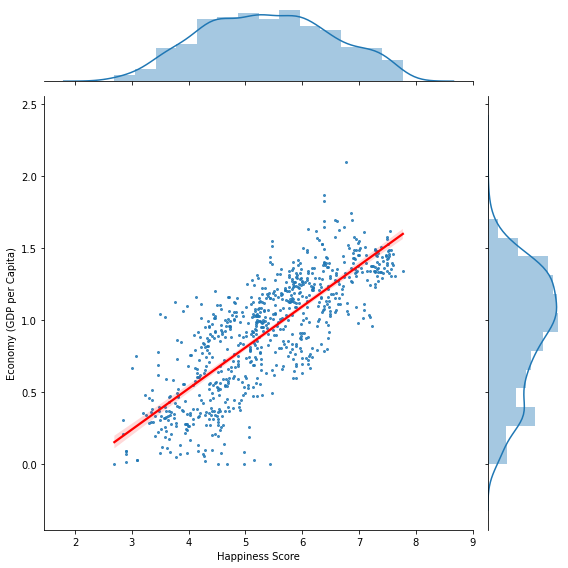

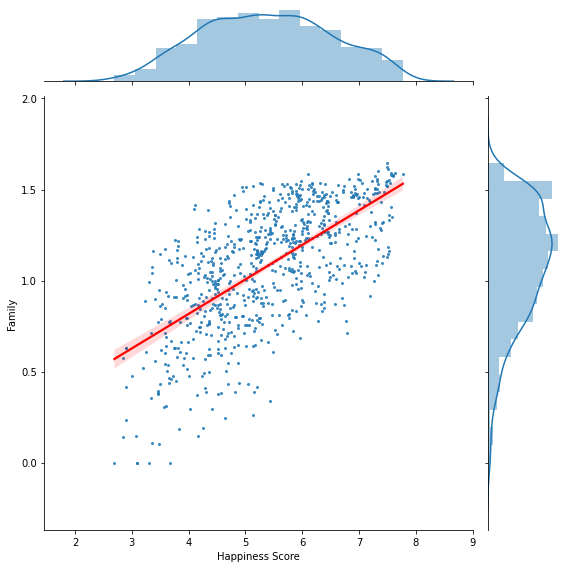

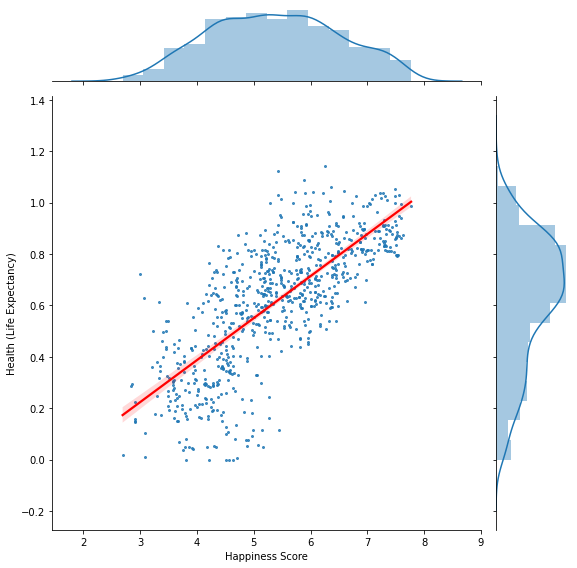

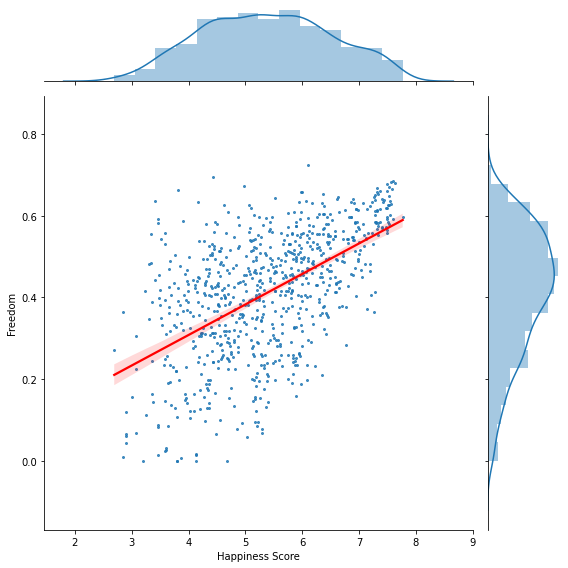

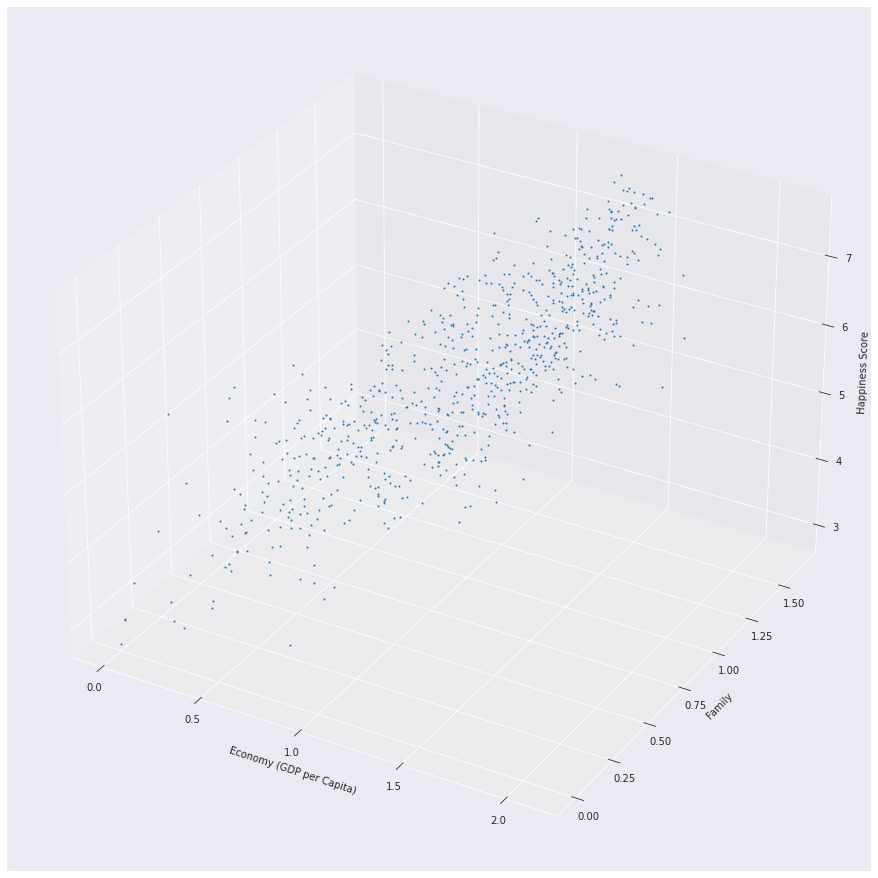

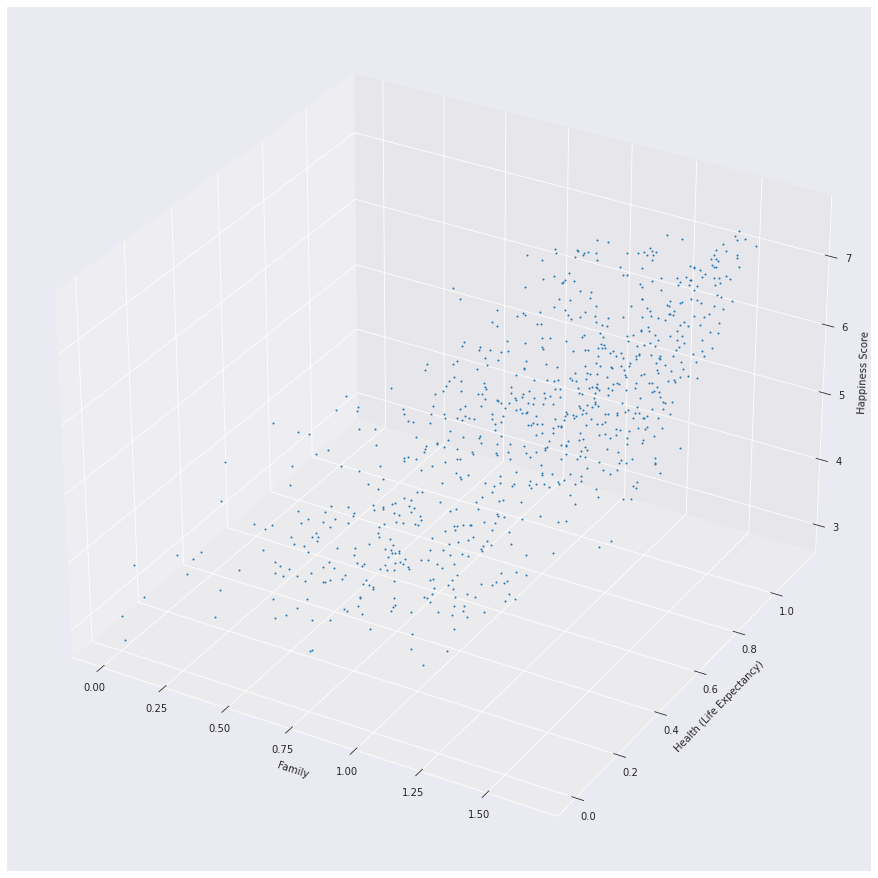

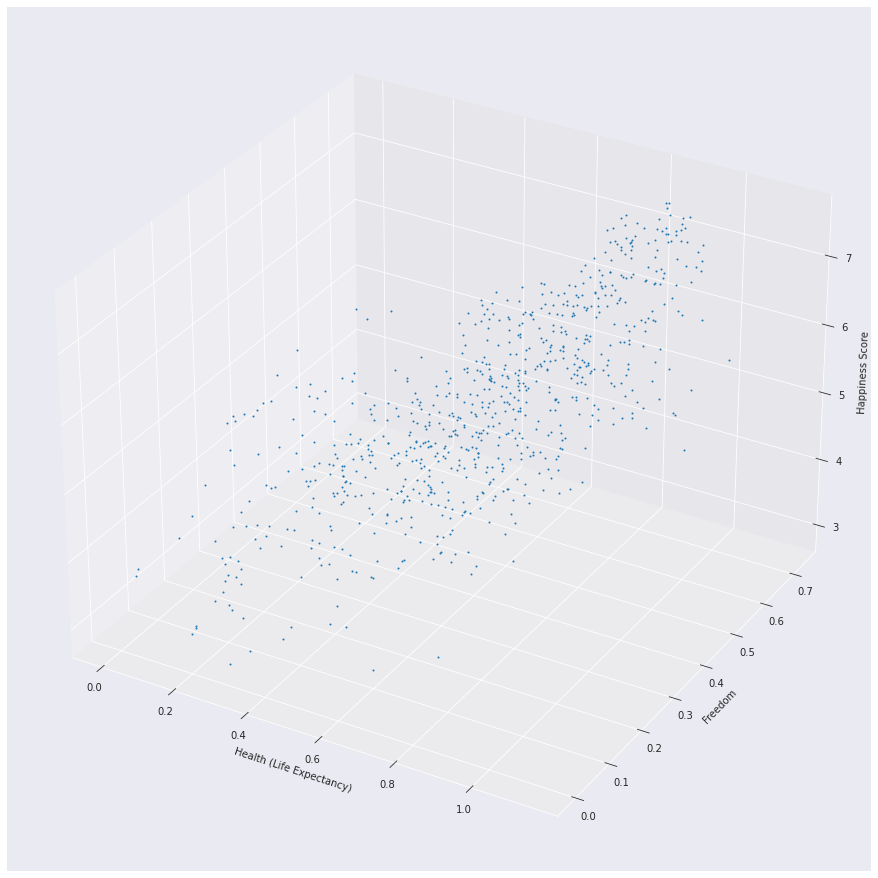

In [15]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [16]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [17]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
